In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
red = pd.read_csv('winequality-red.csv',delimiter=';')

In [3]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


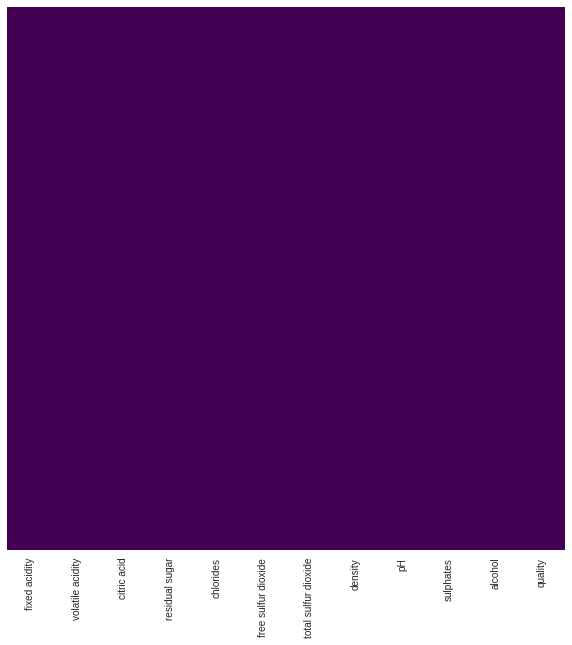

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(red.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


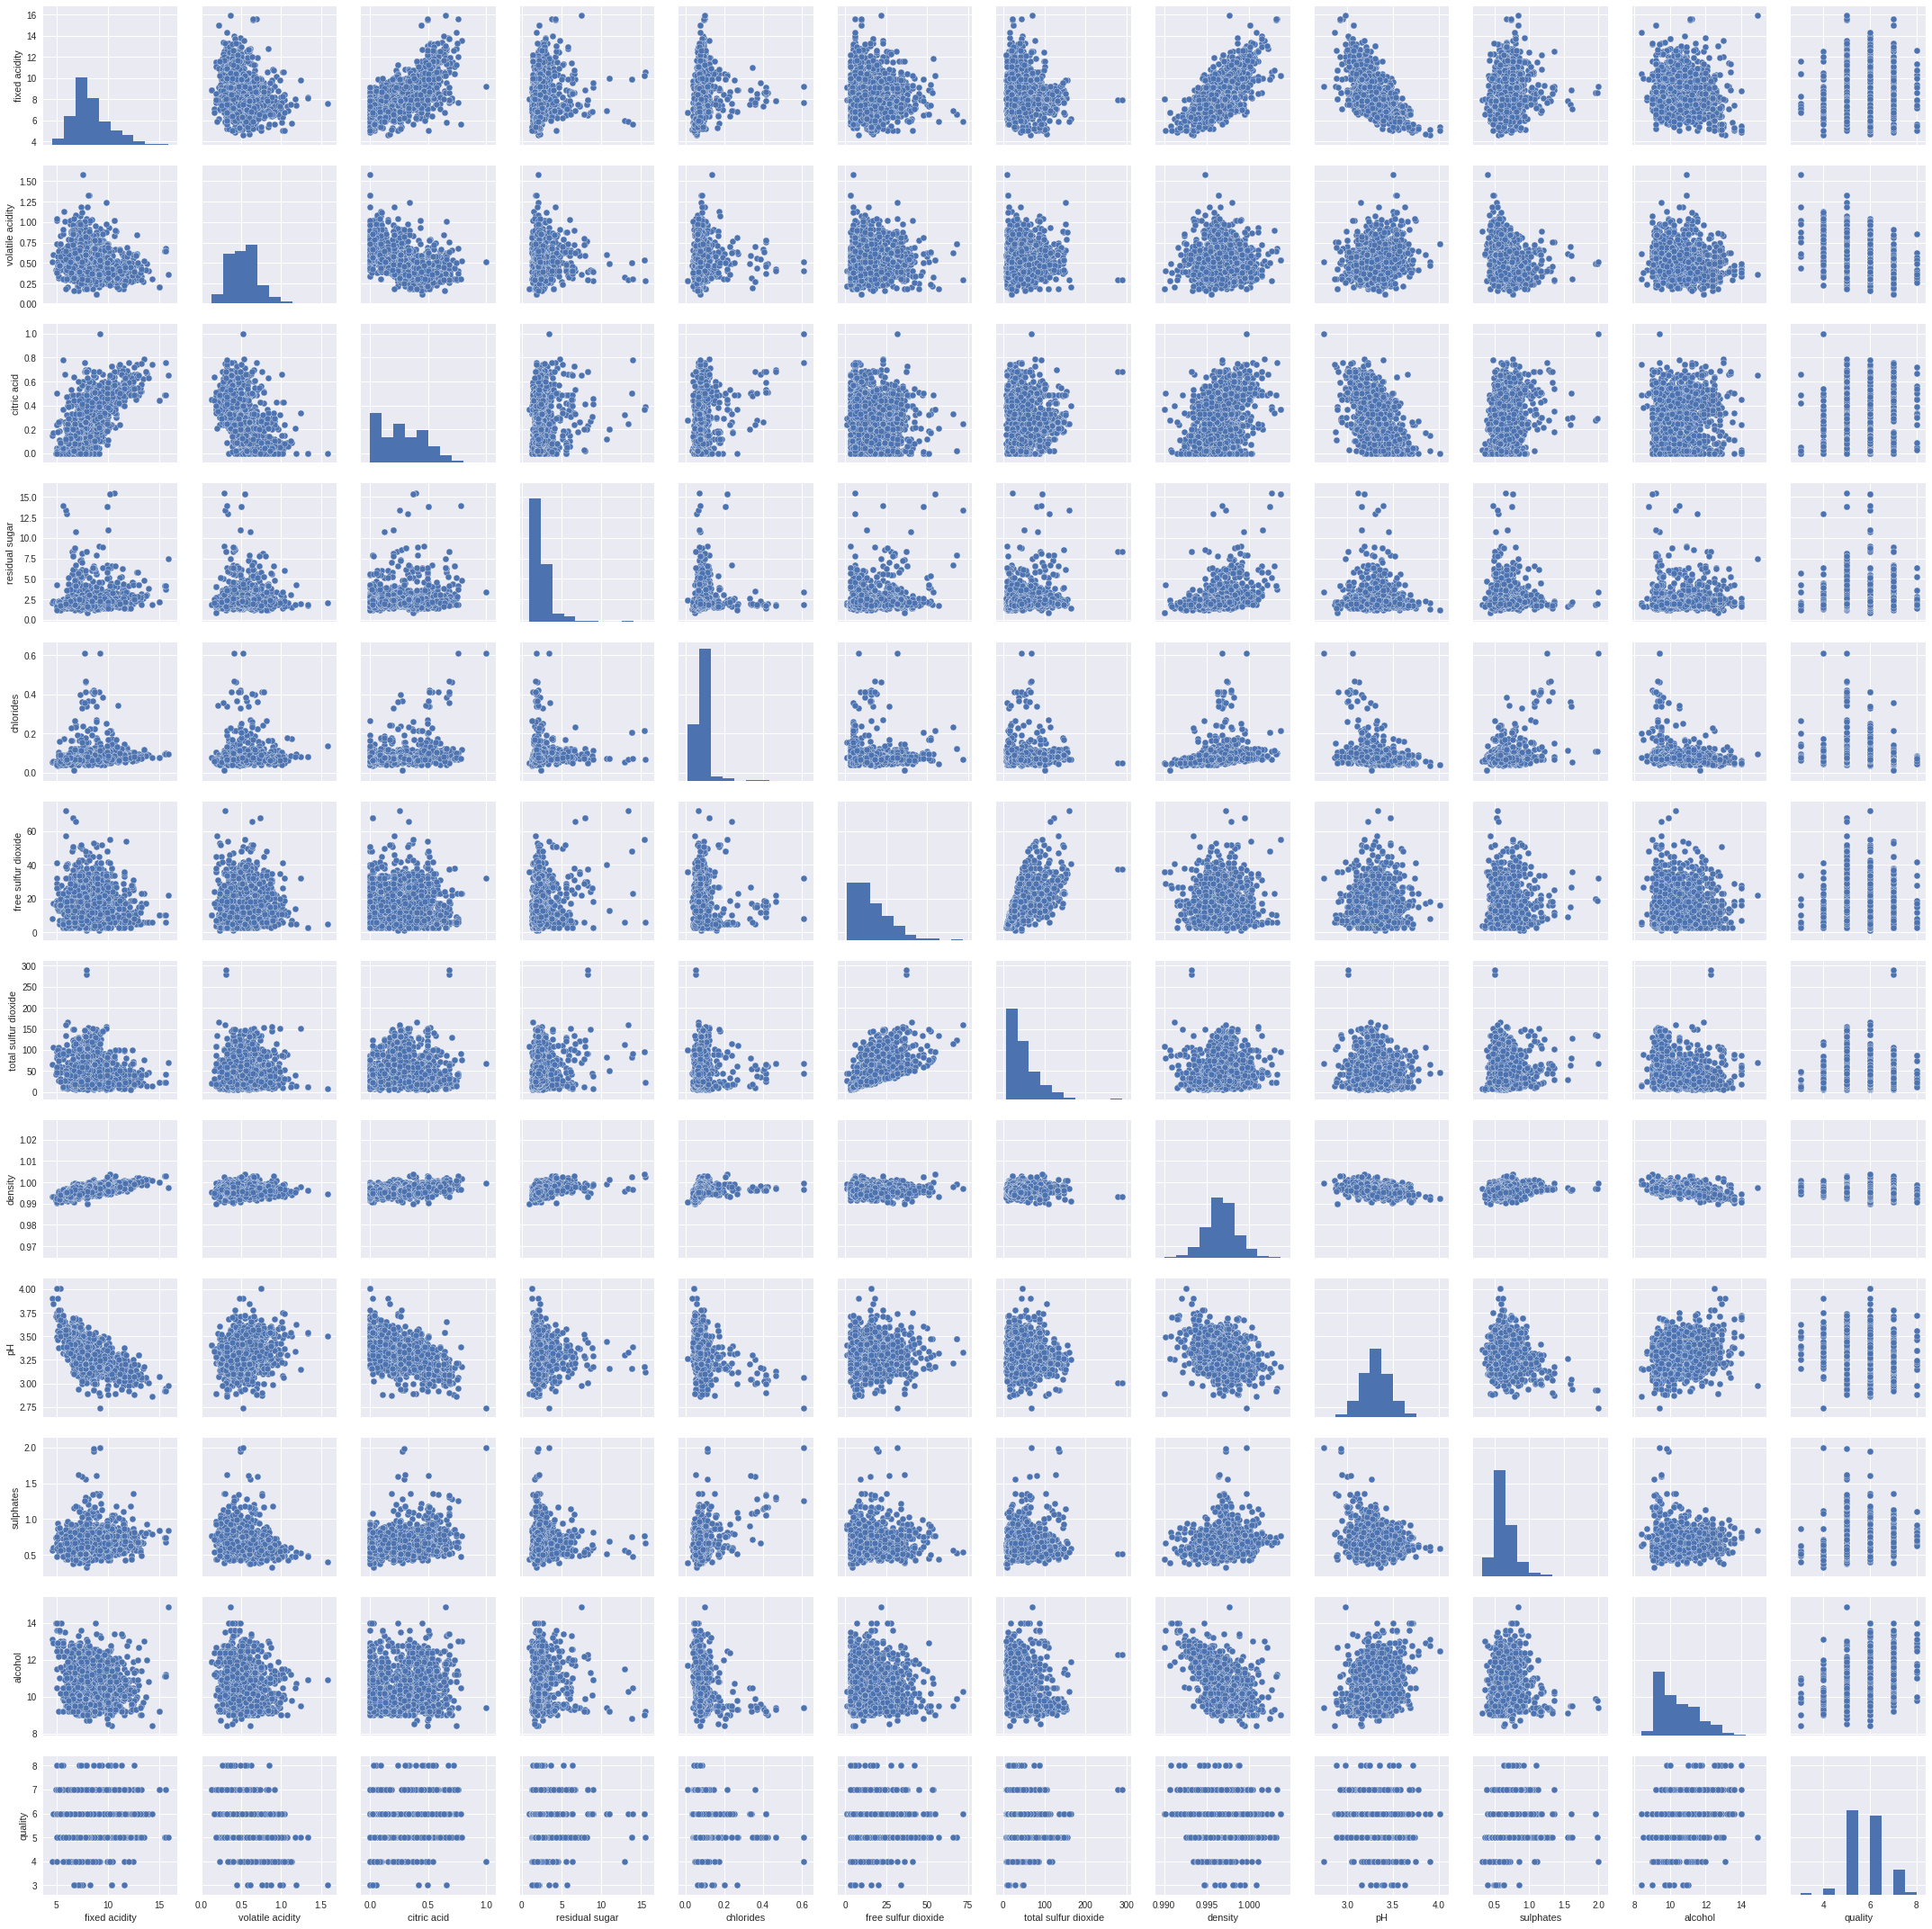

In [8]:
sns.pairplot(data=red)

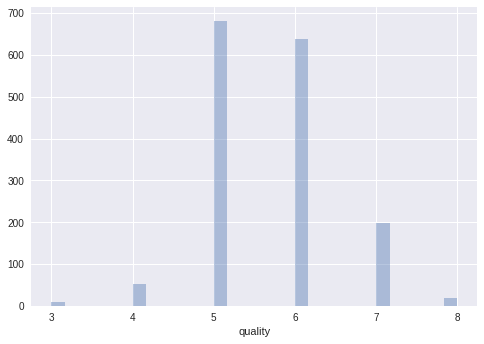

In [9]:
sns.distplot(red['quality'],kde=False)

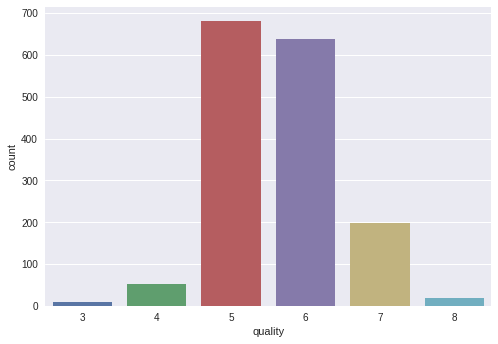

In [10]:
sns.countplot(x=red['quality'])

# Classification using Logistic Regression

In [11]:
from sklearn.cross_validation import train_test_split

/home/santhosh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X = red.drop('quality',axis=1)
y = red['quality']

In [13]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [14]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lm = LogisticRegression()

In [74]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
lmpredict = lm.predict(X_test)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
print('Classification Report :\n',classification_report(y_test,lmpredict),'\n','Confusion Matrix :\n',confusion_matrix(y_test,lmpredict))

Classification Report :
              precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        22
          5       0.66      0.70      0.68       227
          6       0.49      0.69      0.57       198
          7       0.50      0.06      0.10        71
          8       0.00      0.00      0.00         6

avg / total       0.53      0.57      0.52       528
 
 Confusion Matrix :
 [[  0   0   3   1   0   0]
 [  0   0  15   7   0   0]
 [  0   0 160  66   1   0]
 [  0   0  60 136   2   0]
 [  0   0   6  61   4   0]
 [  0   0   0   5   1   0]]


/home/santhosh/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Classification using KNN

In [79]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [82]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [83]:
scaled_features = scaler.transform(X)

In [84]:
scaled_features

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ..., 
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [86]:
red_feat = pd.DataFrame(scaled_features,columns=red.columns[:-1])

In [87]:
red_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [88]:
from sklearn.cross_validation import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=46)

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
err = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi = knn.predict(X_test)
    err.append(np.mean(predi!=y_test))

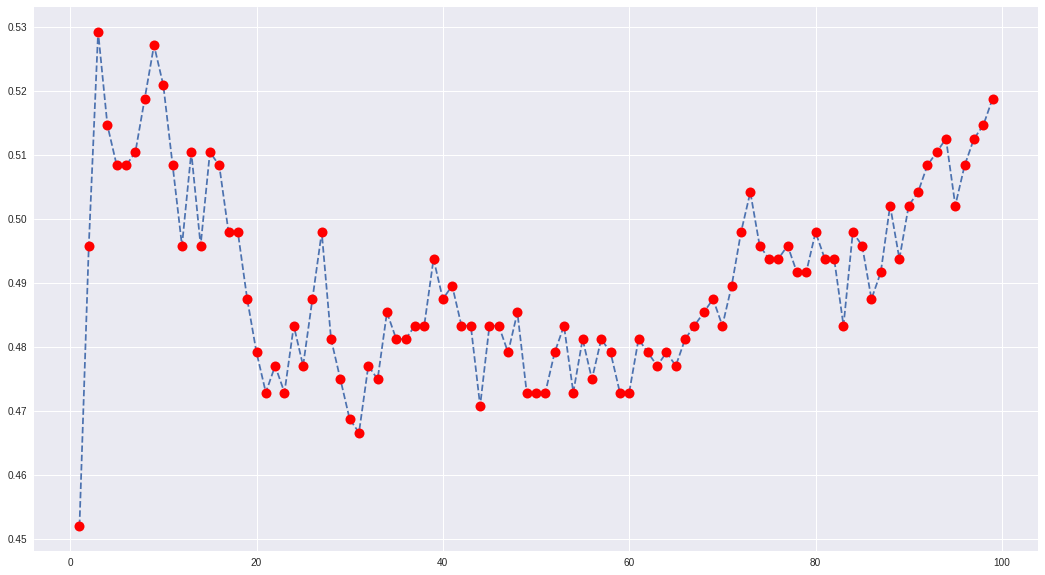

In [171]:
plt.figure(figsize=(18,10))
plt.plot(range(1,100),err,ls='--',marker='o',mfc='red',ms=10)

In [172]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predi = knn.predict(X_test)

In [173]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [174]:
print('Classification Report :\n',classification_report(y_test,predi),'\n','Confusion Matrix :\n',confusion_matrix(y_test,predi),'Accuracy Score :\n',accuracy_score(y_test,predi))

Classification Report :
              precision    recall  f1-score   support

          3       1.00      0.25      0.40         4
          4       0.11      0.05      0.07        19
          5       0.64      0.66      0.65       202
          6       0.51      0.51      0.51       181
          7       0.49      0.51      0.50        69
          8       0.00      0.00      0.00         5

avg / total       0.54      0.55      0.54       480
 
 Confusion Matrix :
 [[  1   0   2   0   1   0]
 [  0   1   5  12   1   0]
 [  0   4 133  56   9   0]
 [  0   4  56  93  25   3]
 [  0   0  12  19  35   3]
 [  0   0   1   3   1   0]] Accuracy Score :
 0.547916666667
